<div align="center"> 
    <br><br>
<img src="https://raw.githubusercontent.com/Nikoletos-K/pyJedAI/main/documentation/pyjedai.logo.drawio.png?raw=true" alt="drawing" width="400"/>
<br><br>
</div>
<hr>
In this notebook we present the pyJedAI approach. pyJedAI is a an end-to-end and an upcoming python framework for Entity Resolution that will be a manual of the Entity Resolution. Its usages will outperform other state-of-the-art ER frameworks as it's easy-to-use and highly optimized as it is consisted from other established python libraries (i.e pandas, networkX, ..).

<!-- The bellow figure depicts pyJedAIs structure. -->
<!-- <div align="center"> 
<img src="https://github.com/Nikoletos-K/pyJedAI/blob/main/documentation/pyJedAIarchitecture.png?raw=true" alt="drawing" width="800"/>
</div> -->

# Instalation

pyJedAI is an open-source library that can be installed from PyPI.

For more: [pypi.org/project/pyjedai/](https://pypi.org/project/pyjedai/)

In [ ]:
%pip install pyjedai

# Reading the dataset - Clean-Clean ER example

pyJedAI in order to perfrom needs only the tranformation of the initial data into a pandas DataFrame. Hence, pyJedAI can function in every structured or semi-structured data. In this case Abt-Buy dataset is provided as .csv files. 

In [3]:
import pandas as pd

from pyjedai.datamodel import Data

d1 = pd.read_csv("./data/D2/abt.csv", sep='|', engine='python', na_filter=False).astype(str)
d2 = pd.read_csv("./data/D2/buy.csv", sep='|', engine='python', na_filter=False).astype(str)
gt = pd.read_csv("./data/D2/gt.csv", sep='|', engine='python')

data = Data(
    dataset_1=d1,
    attributes_1=['id','name','description'],
    id_column_name_1='id',
    dataset_2=d2,
    attributes_2=['id','name','description'],
    id_column_name_2='id',
    ground_truth=gt,
)

data.process()

In [4]:
data.print_specs()

Type of Entity Resolution:  Clean-Clean
Number of entities in D1:  1076
Attributes provided  for D1:  ['id', 'name', 'description']

Number of entities in D2:  1076
Attributes provided  for D2:  ['id', 'name', 'description']

Total number of entities:  2152
Number of matching pairs in ground-truth:  1076


In [6]:
data.dataset_1.head(2)

,id,name,description,price
0,0,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,
1,1,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,399


In [7]:
data.dataset_2.head(2)

,id,name,description,price
0,0,Linksys EtherFast EZXS88W Ethernet Switch - EZ...,Linksys EtherFast 8-Port 10/100 Switch (New/Wo...,
1,1,Linksys EtherFast EZXS55W Ethernet Switch,5 x 10/100Base-TX LAN,


In [8]:
data.ground_truth.head(2)

,D1,D2
0,206,216
1,60,46


# Creating workflow using pyJedAI methods

In [11]:
from pyjedai.workflow import WorkFlow, compare_workflows
from pyjedai.block_building import (
    StandardBlocking, QGramsBlocking, ExtendedQGramsBlocking, 
    SuffixArraysBlocking, ExtendedSuffixArraysBlocking
)
from pyjedai.block_cleaning import BlockFiltering, BlockPurging
from pyjedai.comparison_cleaning import (
    WeightedEdgePruning, WeightedNodePruning, CardinalityEdgePruning, 
    CardinalityNodePruning, BLAST, ReciprocalCardinalityNodePruning, 
    ReciprocalWeightedNodePruning, ComparisonPropagation
)
from pyjedai.matching import EntityMatching
from pyjedai.clustering import ConnectedComponentsClustering

In [18]:
w = WorkFlow(
    block_building = dict(
        method=QGramsBlocking, 
        params=dict(qgrams=3)
    ),
    block_cleaning = [
        dict(
            method=BlockFiltering, 
            params=dict(ratio=0.8)
        ),
        dict(
            method=BlockPurging,
            params=dict(smoothing_factor=1.025)
        )
    ],
    comparison_cleaning = dict(method=CardinalityEdgePruning),
        entity_matching = dict(
        method=EntityMatching, 
        metric='sorensen_dice',
        similarity_threshold=0.5,
        attributes = ['description', 'name']
    ),
    clustering = dict(method=ConnectedComponentsClustering),
    name="Worflow-Demo"
)

# Evaluation and detailed reporting

In [19]:
w.run(data, tqdm_disable=False, verbose=False)

Q-Grams Blocking:   0%|          | 0/2152 [00:00<?, ?it/s]

Block Filtering:   0%|                                                                                        …

Block Purging:   0%|          | 0/9958 [00:00<?, ?it/s]

Cardinality Edge Pruning:   0%|          | 0/1076 [00:00<?, ?it/s]

Entity Matching (sorensen_dice):   0%|          | 0/1076 [00:00<?, ?it/s]

In [20]:
w.to_df()

,Algorithm,F1,Recall,Precision,Runtime (sec),Params
0,Q-Grams Blocking,0.041641,100.000000,0.020825,1.675559,{'Q-Gramms': 3}
1,Block Filtering,0.029729,100.000000,0.014867,0.771066,{'Ratio': 0.8}
2,Block Purging,0.023116,100.000000,0.011559,0.246066,"{'Smoothing factor': 1.025, 'Max Comparisons p..."
3,Cardinality Edge Pruning,3.383632,98.884758,1.721265,16.929672,"{'Node centric': False, 'Weighting scheme': 'JS'}"
4,Entity Matching,3.383632,98.884758,1.721265,176.714506,"{'Metric': 'sorensen_dice', 'Embeddings': None..."
5,Connected Components Clustering,0.176289,99.907063,0.088222,0.026133,{}


# Visualization

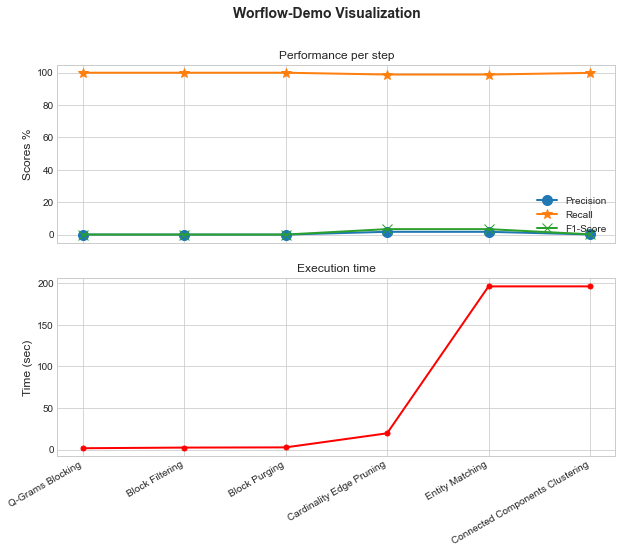

In [21]:
w.visualize()

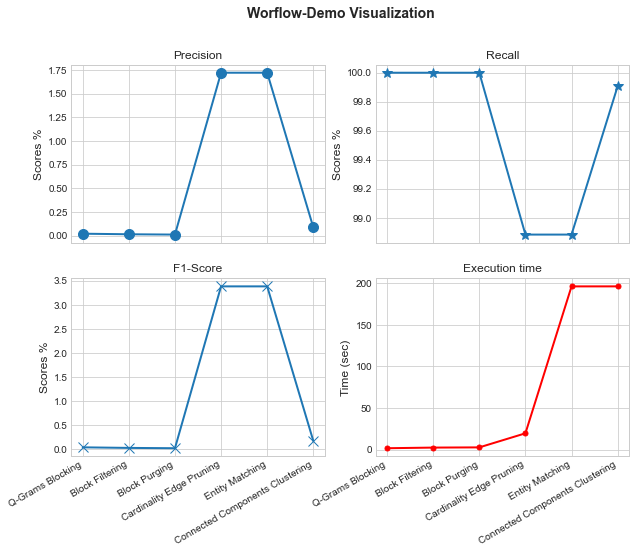

In [22]:
w.visualize(separate=True)

<hr>
<div align="right">
K. Nikoletos, G. Papadakis & M. Koubarakis
</div>
<div align="right">
<a href="https://github.com/Nikoletos-K/pyJedAI/blob/main/LICENSE">Apache License 2.0</a>
</div>